In [1]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        fill_mode='nearest',  # set mode for filling points outside the input boundaries
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rescale=None,  # set rescaling factor (applied before any other transformation)
        preprocessing_function=None,  # set function that will be applied on each input
        data_format=None)  # image data format, either "channels_first" or "channels_last"
        # fraction of images reserved for validation (strictly between 0 and 1)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)


Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 332s 212ms/step - loss: 1.8825 - acc: 0.3085 - val_loss: 1.5599 - val_acc: 0.4476
Epoch 2/10
1563/1563 [==============================] - 351s 225ms/step - loss: 1.5832 - acc: 0.4243 - val_loss: 1.3940 - val_acc: 0.5077
Epoch 3/10
1563/1563 [==============================] - 354s 226ms/step - loss: 1.4441 - acc: 0.4818 - val_loss: 1.2655 - val_acc: 0.5519
Epoch 4/10
1563/1563 [==============================] - 548s 351ms/step - loss: 1.3485 - acc: 0.5194 - val_loss: 1.1919 - val_acc: 0.5841
Epoch 5/10
1563/1563 [==============================] - 359s 230ms/step - loss: 1.2768 - acc: 0.5459 - val_loss: 1.0931 -

In [2]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)

model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt 
plt.plot(history.history['val_acc'])

Saved trained model at /Users/tx/Desktop/assignments/A3/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 19s 2ms/step
Test loss: 0.9191784700393677
Test accuracy: 0.6772


In [3]:
model_name = 'dense_0.h5'

simple_dense_model_0 = Sequential()
simple_dense_model_0.add(Flatten(input_shape=x_train.shape[1:]))
simple_dense_model_0.add(Dense(num_classes))
simple_dense_model_0.add(Activation('softmax'))

# Let's train the model using RMSprop
simple_dense_model_0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    sd0_history = simple_dense_model_0.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    
    # Fit the model on the batches generated by datagen.flow().
    sd0_history = simple_dense_model_0.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
simple_dense_model_0.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = simple_dense_model_0.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 37s 24ms/step - loss: 2.0277 - acc: 0.2721 - val_loss: 1.8969 - val_acc: 0.3332
Epoch 2/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.9129 - acc: 0.3232 - val_loss: 1.8681 - val_acc: 0.3384
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.8835 - acc: 0.3385 - val_loss: 1.8293 - val_acc: 0.3619
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.8677 - acc: 0.3419 - val_loss: 1.8009 - val_acc: 0.3753
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8577 - acc: 0.3498 - val_loss: 1.7920 - val_acc: 0.3766
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8528 - acc: 0.3504 - val_loss: 1.7900 - val_acc: 0.3776
Epoch 7/10
1563/1563 [==============================] - 163s 105ms/step - loss: 1.8449 - acc: 0.3542 - val_loss: 1.7758 - val_acc: 0.3915
Epoch 8/10


In [5]:
model_name = 'dense_1.h5'

simple_dense_model_1 = Sequential()
simple_dense_model_1.add(Flatten(input_shape=x_train.shape[1:]))
simple_dense_model_1.add(Dense(512))
simple_dense_model_1.add(Activation('relu'))
simple_dense_model_1.add(Dropout(0.5))
simple_dense_model_1.add(Dense(num_classes))
simple_dense_model_1.add(Activation('softmax'))

# Let's train the model using RMSprop
simple_dense_model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    sd1_history = simple_dense_model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    
    # Fit the model on the batches generated by datagen.flow().
    sd1_history = simple_dense_model_1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
simple_dense_model_1.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = simple_dense_model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 45s 29ms/step - loss: 2.0150 - acc: 0.2689 - val_loss: 1.8303 - val_acc: 0.3631
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.8853 - acc: 0.3228 - val_loss: 1.7334 - val_acc: 0.3889
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.8423 - acc: 0.3408 - val_loss: 1.6862 - val_acc: 0.4123
Epoch 4/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.8101 - acc: 0.3552 - val_loss: 1.6574 - val_acc: 0.4177
Epoch 5/10
1563/1563 [==============================] - 246s 157ms/step - loss: 1.7883 - acc: 0.3629 - val_loss: 1.6548 - val_acc: 0.4190
Epoch 6/10
1563/1563 [==============================] - 692s 443ms/step - loss: 1.7651 - acc: 0.3727 - val_loss: 1.6311 - val_acc: 0.4246
Epoch 7/10
1563/1563 [==============================] - 409s 262ms/step - loss: 1.7534 - acc: 0.3761 - val_loss: 1.5752 - val_acc: 0.4486
Epoch 8

In [11]:
model_name = 'dense_2.h5'

simple_dense_model_2 = Sequential()
simple_dense_model_2.add(Flatten(input_shape=x_train.shape[1:]))
simple_dense_model_2.add(Dense(512))
simple_dense_model_2.add(Activation('relu'))
simple_dense_model_2.add(Dropout(0.5))
simple_dense_model_2.add(Dense(512))
simple_dense_model_2.add(Activation('relu'))
simple_dense_model_2.add(Dropout(0.5))
simple_dense_model_2.add(Dense(num_classes))
simple_dense_model_2.add(Activation('softmax'))

# Let's train the model using RMSprop
simple_dense_model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    sd2_history = simple_dense_model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # Fit the model on the batches generated by datagen.flow().
    sd2_history = simple_dense_model_2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
simple_dense_model_2.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = simple_dense_model_2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 60s 39ms/step - loss: 2.1042 - acc: 0.2240 - val_loss: 1.8699 - val_acc: 0.3269
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.9524 - acc: 0.2891 - val_loss: 1.7833 - val_acc: 0.3697
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8995 - acc: 0.3127 - val_loss: 1.7441 - val_acc: 0.3846
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8791 - acc: 0.3234 - val_loss: 1.7067 - val_acc: 0.3955
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8557 - acc: 0.3340 - val_loss: 1.6785 - val_acc: 0.4001
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8371 - acc: 0.3403 - val_loss: 1.6437 - val_acc: 0.4271
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8281 - acc: 0.3485 - val_loss: 1.6572 - val_acc: 0.4236
Epoch 8/10
15

In [13]:
model_name = 'dense_3.h5'

simple_dense_model_3 = Sequential()
simple_dense_model_3.add(Flatten(input_shape=x_train.shape[1:]))
simple_dense_model_3.add(Dense(512))
simple_dense_model_3.add(Activation('relu'))
simple_dense_model_3.add(Dropout(0.5))
simple_dense_model_3.add(Dense(512))
simple_dense_model_3.add(Activation('relu'))
simple_dense_model_3.add(Dropout(0.5))
simple_dense_model_3.add(Dense(512))
simple_dense_model_3.add(Activation('relu'))
simple_dense_model_3.add(Dropout(0.5))
simple_dense_model_3.add(Dense(num_classes))
simple_dense_model_3.add(Activation('softmax'))

# Let's train the model using RMSprop
simple_dense_model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    sd3_history = simple_dense_model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # Fit the model on the batches generated by datagen.flow().
    sd3_history = simple_dense_model_3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
simple_dense_model_3.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = simple_dense_model_3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 2.1586 - acc: 0.1876 - val_loss: 1.9424 - val_acc: 0.3056
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 2.0047 - acc: 0.2605 - val_loss: 1.8489 - val_acc: 0.3451
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.9535 - acc: 0.2835 - val_loss: 1.7884 - val_acc: 0.3597
Epoch 4/10
1563/1563 [==============================] - 157s 101ms/step - loss: 1.9237 - acc: 0.3007 - val_loss: 1.7554 - val_acc: 0.3770
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.9066 - acc: 0.3112 - val_loss: 1.7611 - val_acc: 0.3840
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.8888 - acc: 0.3159 - val_loss: 1.7209 - val_acc: 0.3999
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8699 - acc: 0.3224 - val_loss: 1.7265 - val_acc: 0.3936
Epoch 8/10


In [8]:
model_name = 'dense_4.h5'

simple_dense_model_4 = Sequential()
simple_dense_model_4.add(Flatten(input_shape=x_train.shape[1:]))
simple_dense_model_4.add(Dense(512))
simple_dense_model_4.add(Activation('relu'))
simple_dense_model_4.add(Dropout(0.5))
simple_dense_model_4.add(Dense(512))
simple_dense_model_4.add(Activation('relu'))
simple_dense_model_4.add(Dropout(0.5))
simple_dense_model_4.add(Dense(512))
simple_dense_model_4.add(Activation('relu'))
simple_dense_model_4.add(Dropout(0.5))
simple_dense_model_4.add(Dense(512))
simple_dense_model_4.add(Activation('relu'))
simple_dense_model_4.add(Dropout(0.5))
simple_dense_model_4.add(Dense(num_classes))
simple_dense_model_4.add(Activation('softmax'))

# Let's train the model using RMSprop
simple_dense_model_4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    sd4_history = simple_dense_model_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # Fit the model on the batches generated by datagen.flow().
    sd4_history = simple_dense_model_4.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
simple_dense_model_4.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = simple_dense_model_4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 2.2189 - acc: 0.1523 - val_loss: 2.0590 - val_acc: 0.2218
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 2.0620 - acc: 0.2211 - val_loss: 1.9376 - val_acc: 0.3129
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.0015 - acc: 0.2543 - val_loss: 1.8833 - val_acc: 0.3109
Epoch 4/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.9753 - acc: 0.2703 - val_loss: 1.8655 - val_acc: 0.3348
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.9477 - acc: 0.2810 - val_loss: 1.8418 - val_acc: 0.3491
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.9396 - acc: 0.2831 - val_loss: 1.8370 - val_acc: 0.3419
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.9275 - acc: 0.2921 - val_loss: 1.8290 - val_acc: 0.3670
Epoch 8/10
15

In [1]:
plt.subplot(112)
plt.plot(history.history['val_acc'])
plt.plot(sd0_history.history['val_acc'])
plt.plot(sd1_history.history['val_acc'])
plt.plot(sd2_history.history['val_acc'])
plt.plot(sd3_history.history['val_acc'])
plt.plot(sd4_history.history['val_acc'])
plt.legend(['Convo','0 Dense','1 Dense','2 Dense','3 Dense','4 Dense'])
plt.title('Simple Dense Layers Validation Accuracy')
plt.show()

NameError: name 'plt' is not defined

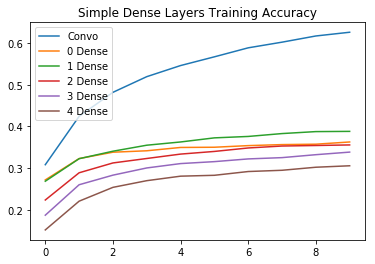

In [26]:
plt.plot(history.history['acc'])
plt.plot(sd0_history.history['acc'])
plt.plot(sd1_history.history['acc'])
plt.plot(sd2_history.history['acc'])
plt.plot(sd3_history.history['acc'])
plt.plot(sd4_history.history['acc'])
plt.legend(['Convo','0 Dense','1 Dense','2 Dense','3 Dense','4 Dense'])
plt.title('Simple Dense Layers Training Accuracy')
plt.show()

In [9]:
model_name = 'sigmoid.h5'

model_sig = Sequential()
model_sig.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_sig.add(Activation('sigmoid'))
model_sig.add(Conv2D(32, (3, 3)))
model_sig.add(Activation('sigmoid'))
model_sig.add(MaxPooling2D(pool_size=(2, 2)))
model_sig.add(Dropout(0.25))

model_sig.add(Conv2D(64, (3, 3), padding='same'))
model_sig.add(Activation('sigmoid'))
model_sig.add(Conv2D(64, (3, 3)))
model_sig.add(Activation('sigmoid'))
model_sig.add(MaxPooling2D(pool_size=(2, 2)))
model_sig.add(Dropout(0.25))

model_sig.add(Flatten())
model_sig.add(Dense(512))
model_sig.add(Activation('sigmoid'))
model_sig.add(Dropout(0.5))
model_sig.add(Dense(num_classes))
model_sig.add(Activation('softmax'))

# Let's train the model using RMSprop
model_sig.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    sig_history = model_sig.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # Fit the model on the batches generated by datagen.flow().
    sig_history = model_sig.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_sig.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model_sig.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 342s 219ms/step - loss: 2.3345 - acc: 0.0972 - val_loss: 2.3043 - val_acc: 0.1000
Epoch 2/10
1563/1563 [==============================] - 366s 234ms/step - loss: 2.3078 - acc: 0.0993 - val_loss: 2.3035 - val_acc: 0.1000
Epoch 3/10
1563/1563 [==============================] - 369s 236ms/step - loss: 2.3070 - acc: 0.0993 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 4/10
1563/1563 [==============================] - 404s 259ms/step - loss: 2.3062 - acc: 0.0992 - val_loss: 2.3032 - val_acc: 0.1000
Epoch 5/10
1563/1563 [==============================] - 405s 259ms/step - loss: 2.3065 - acc: 0.0990 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 6/10
1563/1563 [==============================] - 477s 305ms/step - loss: 2.3055 - acc: 0.1014 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 7/10
1563/1563 [==============================] - 415s 266ms/step - loss: 2.3054 - acc: 0.1001 - val_loss: 2.3034 - val_acc: 0.1000

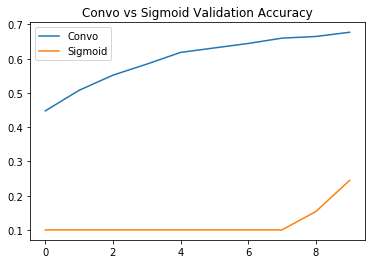

In [30]:
plt.plot(history.history['val_acc'])
plt.plot(sig_history.history['val_acc'])
plt.legend(['Convo','Sigmoid'])
plt.title('Convo vs Sigmoid Validation Accuracy')
plt.show()

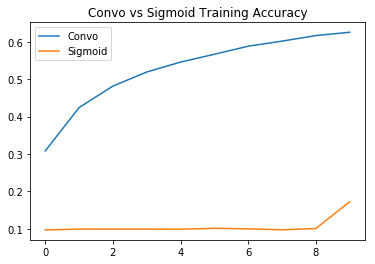

In [29]:
plt.plot(history.history['acc'])
plt.plot(sig_history.history['acc'])
plt.legend(['Convo','Sigmoid'])
plt.title('Convo vs Sigmoid Training Accuracy')
plt.show()

In [ ]:
model_name = 'without_dropout.h5'

without_dropout = Sequential()
without_dropout.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
without_dropout.add(Activation('relu'))
without_dropout.add(Conv2D(32, (3, 3)))
without_dropout.add(Activation('relu'))
without_dropout.add(MaxPooling2D(pool_size=(2, 2)))

without_dropout.add(Conv2D(64, (3, 3), padding='same'))
without_dropout.add(Activation('relu'))
without_dropout.add(Conv2D(64, (3, 3)))
without_dropout.add(Activation('relu'))
without_dropout.add(MaxPooling2D(pool_size=(2, 2)))

without_dropout.add(Flatten())
without_dropout.add(Dense(512))
without_dropout.add(Activation('relu'))

without_dropout.add(Dense(num_classes))
without_dropout.add(Activation('softmax'))

# Let's train the model using RMSprop
without_dropout.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    without_dropout.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # Fit the model on the batches generated by datagen.flow().
    without_dropout.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
without_dropout.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = without_dropout.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


In [ ]:
data_augmentation = False
model_name = 'without_aug_dp.h5'

without_aug_dp = Sequential()
without_aug_dp.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
without_aug_dp.add(Activation('relu'))
without_aug_dp.add(Conv2D(32, (3, 3)))
without_aug_dp.add(Activation('relu'))
without_aug_dp.add(MaxPooling2D(pool_size=(2, 2)))

without_aug_dp.add(Conv2D(64, (3, 3), padding='same'))
without_aug_dp.add(Activation('relu'))
without_aug_dp.add(Conv2D(64, (3, 3)))
without_aug_dp.add(Activation('relu'))
without_aug_dp.add(MaxPooling2D(pool_size=(2, 2)))

without_aug_dp.add(Flatten())
without_aug_dp.add(Dense(512))
without_aug_dp.add(Activation('relu'))

without_aug_dp.add(Dense(num_classes))
without_aug_dp.add(Activation('softmax'))

# Let's train the model using RMSprop
without_aug_dp.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    without_aug_dp.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # Fit the model on the batches generated by datagen.flow().
    without_aug_dp.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
without_aug_dp.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = without_aug_dp.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
data_augmentation = False
model_name = 'without_aug.h5'

without_aug = Sequential()
without_aug.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
without_aug.add(Activation('relu'))
without_aug.add(Conv2D(32, (3, 3)))
without_aug.add(Activation('relu'))
without_aug.add(MaxPooling2D(pool_size=(2, 2)))
without_aug.add(Dropout(0.25))

without_aug.add(Conv2D(64, (3, 3), padding='same'))
without_aug.add(Activation('relu'))
without_aug.add(Conv2D(64, (3, 3)))
without_aug.add(Activation('relu'))
without_aug.add(MaxPooling2D(pool_size=(2, 2)))
without_aug.add(Dropout(0.25))

without_aug.add(Flatten())
without_aug.add(Dense(512))
without_aug.add(Activation('relu'))
without_aug.add(Dropout(0.5))
without_aug.add(Dense(num_classes))
without_aug.add(Activation('softmax'))


# Let's train the model using RMSprop
without_aug.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Not using data augmentation.')
    without_aug.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    
    # Fit the model on the batches generated by datagen.flow().
    without_aug.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
without_aug.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = without_aug.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

